## **Seasonality of S&P500 - The worst and best months of investment return**
---
The aim of the research is to prove if adages like: "Sell in May and go away", "January effect",  "September effect" or "Santa Claus Rally"  are true. 
*  https://www.investopedia.com/terms/s/sell-in-may-and-go-away.asp
*  https://www.investopedia.com/terms/s/september-effect.asp
*  https://www.investopedia.com/terms/s/santaclauseffect.asp
*  https://www.investopedia.com/terms/j/januaryeffect.asp
*  https://stockanalysis.com/average-monthly-stock-returns/
*  https://ycharts.com/indicators/sp_500_monthly_return

### 1. Libraries

In [2]:
#Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Download the historical data of S&P500

In [3]:
#Load the data from yahoofinance for S&P500
df = yf.download("^GSPC", end="2022-01-01", interval = '1d')
#Set the data as the index
df.index.name = None
df['Date'] = df.index
#Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,1950-01-03
1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,1950-01-04
1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000,1950-01-05
1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000,1950-01-06
1950-01-09,17.08,17.08,17.08,17.08,17.08,2520000,1950-01-09


### 3. The average returns for each month

In [4]:
# New DataFrame for monthly returns
df_month = pd.DataFrame()
df_month['Close']= df['Adj Close'].resample('M').ffill().pct_change()
df_month['Date'] = df_month.index
df_month = df_month.dropna()
df_month.head()

,Close,Date
1950-02-28,0.009971,1950-02-28
1950-03-31,0.004065,1950-03-31
1950-04-30,0.038751,1950-04-30
1950-05-31,0.045657,1950-05-31
1950-06-30,-0.058040,1950-06-30


In [5]:
# Clean the data and add columns with months and years
df_month['Month'] = df_month['Date'].dt.month_name()
df_month['Year'] = df_month['Date'].dt.year
df_month = df_month.rename(columns={"Close": "Return"})
df_month.head()

,Return,Date,Month,Year
1950-02-28,0.009971,1950-02-28,February,1950
1950-03-31,0.004065,1950-03-31,March,1950
1950-04-30,0.038751,1950-04-30,April,1950
1950-05-31,0.045657,1950-05-31,May,1950
1950-06-30,-0.058040,1950-06-30,June,1950


In [6]:
# Calculate the average return
Jan = df_month[df_month['Month'] == 'January']['Return'].mean()
Feb = df_month[df_month['Month'] == 'February']['Return'].mean()
Mar = df_month[df_month['Month'] == 'March']['Return'].mean()
Apr = df_month[df_month['Month'] == 'April']['Return'].mean()
May = df_month[df_month['Month'] == 'May']['Return'].mean()
June = df_month[df_month['Month'] == 'June']['Return'].mean()
July = df_month[df_month['Month'] == 'July']['Return'].mean()
Aug = df_month[df_month['Month'] == 'August']['Return'].mean()
Sept = df_month[df_month['Month'] == 'September']['Return'].mean()
Oct = df_month[df_month['Month'] == 'October']['Return'].mean()
Nov = df_month[df_month['Month'] == 'November']['Return'].mean()
Dec = df_month[df_month['Month'] == 'December']['Return'].mean()

In [50]:
# Create a new df
df_AVG = pd.DataFrame()
# Get the average returns for each month and add the values under a new column AVG
df_AVG['AVG'] = Jan, Feb, Mar, Apr, May, June, July, Aug, Sept , Oct, Nov, Dec
# Set the index to be the corresponding integer value of the month
df_AVG = df_AVG.set_index(df_AVG.index + 1)
df_AVG['Date'] = df_AVG.index
df_AVG['Date'] = pd.to_datetime(df_AVG['Date'], format='%m').dt.month_name().str.slice(stop=3)
# Value in [%]
df_AVG['AVG'] = df_AVG['AVG'] * 100
df_AVG

,AVG,Date
1,1.059140,Jan
2,-0.000408,Feb
3,1.034701,Mar
4,1.675649,Apr
5,0.240471,May
6,0.123130,Jun
7,1.164483,Jul
8,0.068244,Aug
9,-0.539874,Sep
10,0.846936,Oct


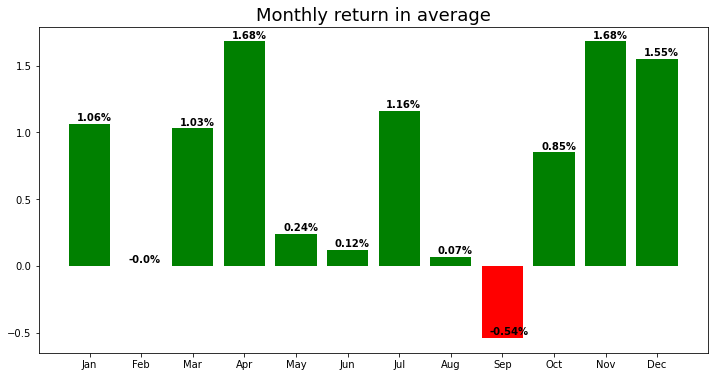

In [54]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.25,  y[i]+0.025,  str(y[i])+'%', weight='bold')

#Visually show the return
AVG_data = np.array(df_AVG['AVG']).round(2)
Date = np.array(df_AVG['Date'])
plt.figure(figsize=(12,6))
clrs = ['green' if (x > 0) else 'red' for x in AVG_data ]
plt.bar(Date, AVG_data, color=clrs)
plt.title('Monthly return in average', fontsize=18)
addlabels(Date, AVG_data)
plt.show()

### 4. Amount of positive and negative months

In [56]:
# Calculate the average return
Jan_v2 = df_month[df_month['Month'] == 'January']['Return']
Feb_v2 = df_month[df_month['Month'] == 'February']['Return']
Mar_v2 = df_month[df_month['Month'] == 'March']['Return']
Apr_v2 = df_month[df_month['Month'] == 'April']['Return']
May_v2 = df_month[df_month['Month'] == 'May']['Return']
June_v2 = df_month[df_month['Month'] == 'June']['Return']
July_v2 = df_month[df_month['Month'] == 'July']['Return']
Aug_v2 = df_month[df_month['Month'] == 'August']['Return']
Sept_v2 = df_month[df_month['Month'] == 'September']['Return']
Oct_v2 = df_month[df_month['Month'] == 'October']['Return']
Nov_v2 = df_month[df_month['Month'] == 'November']['Return']
Dec_v2 = df_month[df_month['Month'] == 'December']['Return']

Jan_v2_positive = [element for element in Jan_v2 if element > 0]
Feb_v2_positive = [element for element in Feb_v2 if element > 0]
Mar_v2_positive = [element for element in Mar_v2 if element > 0]
Apr_v2_positive = [element for element in Apr_v2 if element > 0]
May_v2_positive = [element for element in May_v2 if element > 0]
June_v2_positive = [element for element in June_v2 if element > 0]
July_v2_positive = [element for element in July_v2 if element > 0]
Aug_v2_positive = [element for element in Aug_v2 if element > 0]
Sept_v2_positive = [element for element in Sept_v2 if element > 0]
Oct_v2_positive = [element for element in Oct_v2 if element > 0]
Nov_v2_positive = [element for element in Nov_v2 if element > 0]
Dec_v2_positive = [element for element in Dec_v2 if element > 0]

In [57]:
Positive_months = [len(Jan_v2_positive)/len(Jan_v2)*100,
                    len(Feb_v2_positive)/len(Feb_v2)*100,
                    len(Mar_v2_positive)/len(Mar_v2)*100,
                    len(Apr_v2_positive)/len(Apr_v2)*100,
                    len(May_v2_positive)/len(May_v2)*100,
                    len(June_v2_positive)/len(June_v2)*100,
                    len(July_v2_positive)/len(July_v2)*100,
                    len(Aug_v2_positive)/len(Aug_v2)*100,
                    len(Sept_v2_positive)/len(Sept_v2)*100,
                    len(Oct_v2_positive)/len(Oct_v2)*100,
                    len(Nov_v2_positive)/len(Nov_v2)*100,
                    len(Dec_v2_positive)/len(Dec_v2)*100]
Positive_months

[59.154929577464785,
 55.55555555555556,
 63.888888888888886,
 72.22222222222221,
 59.72222222222222,
 54.166666666666664,
 58.333333333333336,
 55.55555555555556,
 44.44444444444444,
 59.72222222222222,
 68.05555555555556,
 75.0]

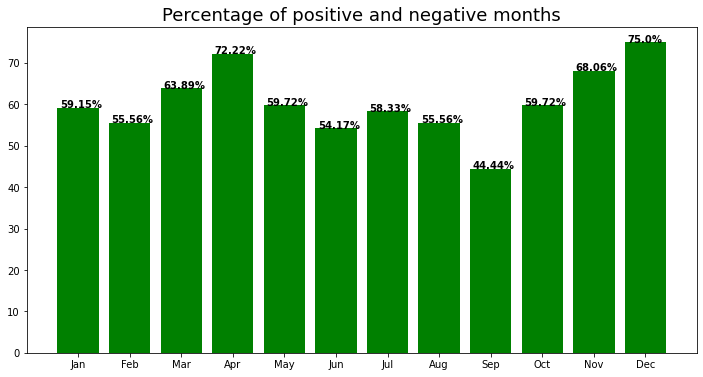

In [60]:
#Visually show the return
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.35,  y[i]+0.025,  str(y[i])+'%', weight='bold')

AVG_data = np.array(Positive_months).round(2)
Date = np.array(df_AVG['Date'])
plt.figure(figsize=(12,6))
clrs = ['green' if (x > 0) else 'red' for x in AVG_data ]
plt.bar(Date, AVG_data, color=clrs)
plt.title('Percentage of positive and negative months', fontsize=18)
addlabels(Date, AVG_data)
plt.show()

### 5. Median of return

In [61]:
# Calculate the median of return
Jan_median = df_month[df_month['Month'] == 'January']['Return'].median()
Feb_median = df_month[df_month['Month'] == 'February']['Return'].median()
Mar_median = df_month[df_month['Month'] == 'March']['Return'].median()
Apr_median = df_month[df_month['Month'] == 'April']['Return'].median()
May_median = df_month[df_month['Month'] == 'May']['Return'].median()
June_median = df_month[df_month['Month'] == 'June']['Return'].median()
July_median = df_month[df_month['Month'] == 'July']['Return'].median()
Aug_median = df_month[df_month['Month'] == 'August']['Return'].median()
Sept_median = df_month[df_month['Month'] == 'September']['Return'].median()
Oct_median = df_month[df_month['Month'] == 'October']['Return'].median()
Nov_median = df_month[df_month['Month'] == 'November']['Return'].median()
Dec_median = df_month[df_month['Month'] == 'December']['Return'].median()

In [62]:
# Create a new df
df_median = pd.DataFrame()
# Get the average returns for each month and add the values under a new column AVG
df_median['Median'] = Jan_median, Feb_median, Mar_median, Apr_median, May_median, June_median, July_median, Aug_median, Sept_median , Oct_median, Nov_median, Dec_median
# Set the index to be the corresponding integer value of the month
df_median = df_median.set_index(df_median.index + 1)
df_median['Date'] = df_median.index
df_median['Date'] = pd.to_datetime(df_median['Date'], format='%m').dt.month_name().str.slice(stop=3)
# Value in [%]
df_median['Median'] = df_median['Median'] * 100
df_median

,Median,Date
1,1.556579,Jan
2,0.473826,Feb
3,1.229690,Mar
4,1.279354,Apr
5,1.058278,May
6,0.072017,Jun
7,1.286286,Jul
8,0.857716,Aug
9,-0.297986,Sep
10,1.028439,Oct


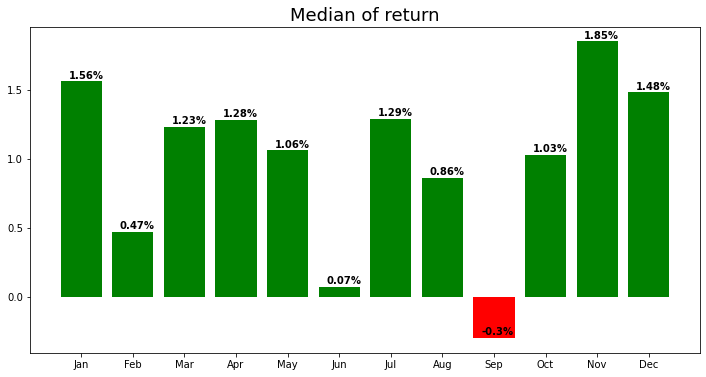

In [63]:
#Visually show the return
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.25,  y[i]+0.025,  str(y[i])+'%', weight='bold')

Median_data = np.array(df_median['Median']).round(2)
Date = np.array(df_median['Date'])
plt.figure(figsize=(12,6))
clrs = ['green' if (x > 0) else 'red' for x in Median_data ]
plt.bar(Date, Median_data, color=clrs)
plt.title('Median of return', fontsize=18)
addlabels(Date, Median_data)
plt.show()

### 6. Conclusion

1.  **"Sell in May and go away":**

| AVG   | Median | Pos   |
|:-----:|:------:|:-----:|
| 0.24% | 1.06%  | 59.72%|

Regarding the adages, we should sell stock in May before the Jun dropdown. In reality Jun is not so bad month. Both AVG and Median are positive in this time period. There is no reason to sell stocks at this moment.

2. **"January effect":**

| AVG   | Median | Pos   |
|:-----:|:------:|:-----:|
| 1.06% | 1.56%  | 59.15%|

It can be noticed that November, December and January are very good for investors and traders. Statistically in this 3 months we can expect the highest up swing during the whole year.

3. **"September effect":**

| AVG   | Median | Pos   |
|:-----:|:------:|:-----:|
|-0.54% | -0.3%  | 44.44%|

According to the results, in September we can expect dropdown, witch might be very good moment to accumulate stocks.

4. **"Santa Claus Rally":**

| AVG   | Median | Pos   |
|:-----:|:------:|:-----:|
| 1.55% | 1.48%  | 75.00%|

The conclusion is the same as for "September effect".